# Imersão em Dados - Data Viking

## Análise de criptomoedas

In [ ]:
# instalar pacote financeiro da B3
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# importando pacotes

# biblioteca de "modelagem de dados"
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# análises gráficas (alto nível)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime

# Yahoo Finance
import yfinance as yf
yf.pdr_override() #args personalizados

# avisos
import warnings
warnings.filterwarnings('ignore')

### API Yahoo Finance

O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo Finanças

In [ ]:
# especificar o símbolo da açãoo e o período de tempo desejado
simbolo = 'BTC-USD'
inicio = '2021-10-24'
fim = '2023-10-24'
periodo = '6mo'

# coletando dados
dados = web.get_data_yahoo(simbolo, start=inicio, end=fim)

# verificar
dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-24,61368.343750,61505.804688,59643.343750,60930.835938,60930.835938,27316183882
2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,31064911614
2021-10-26,63032.761719,63229.027344,59991.160156,60363.792969,60363.792969,34878965587
2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893
2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247


In [ ]:
dados = web.get_data_yahoo(simbolo, period=periodo)

dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943


In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825
2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,35437.253906,22446272005
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,34938.242188,20998158544
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996


In [ ]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,28387.607050,28780.848994,28038.758991,28420.302066,28420.302066,1.386303e+10
std,2371.792210,2458.465705,2364.715881,2419.127438,2419.127438,5.787260e+09
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,26556.497070,26876.786621,26235.788574,26560.643066,26560.643066,1.043400e+10
50%,27637.861328,28045.999023,27173.012695,27640.265625,27640.265625,1.279559e+10
75%,29870.630859,30196.506836,29609.730469,29908.892578,29908.892578,1.568185e+10
max,35441.578125,35919.843750,34871.250000,35437.253906,35437.253906,4.493500e+10


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2023-05-07 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


In [ ]:
dados.shape

(184, 6)

### Média Móvel

**Media Móvel**

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.


**O que é a média móvel?**

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.



E como fazer esse cálculo?
<br>
Basta utilizar a fórmula:
MMA = Soma dos preços de fechamento ÷ Número de dias


Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são: <br> 11,12,13,14,15,16 e 17.
<br>

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13 <br>
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14 <br>
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15

Text(0.5, 1.0, 'Preço de fechamento')

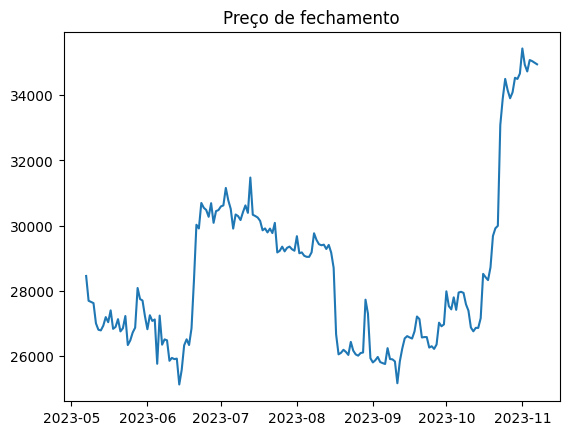

In [ ]:
# Análise gráfica
plt.plot(dados['Close'])
plt.title('Preço de fechamento')

#### Função Rolling

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

In [ ]:
periodo = 5
dados['Close'].rolling(window=periodo).mean()

Date
2023-05-07             NaN
2023-05-08             NaN
2023-05-09             NaN
2023-05-10             NaN
2023-05-11    27686.114453
                  ...     
2023-11-02    34816.824219
2023-11-03    34855.592969
2023-11-04    34971.559375
2023-11-05    35047.874219
2023-11-07    34950.799219
Name: Close, Length: 184, dtype: float64

Text(0.5, 1.0, 'Análise do preço de fechamento')

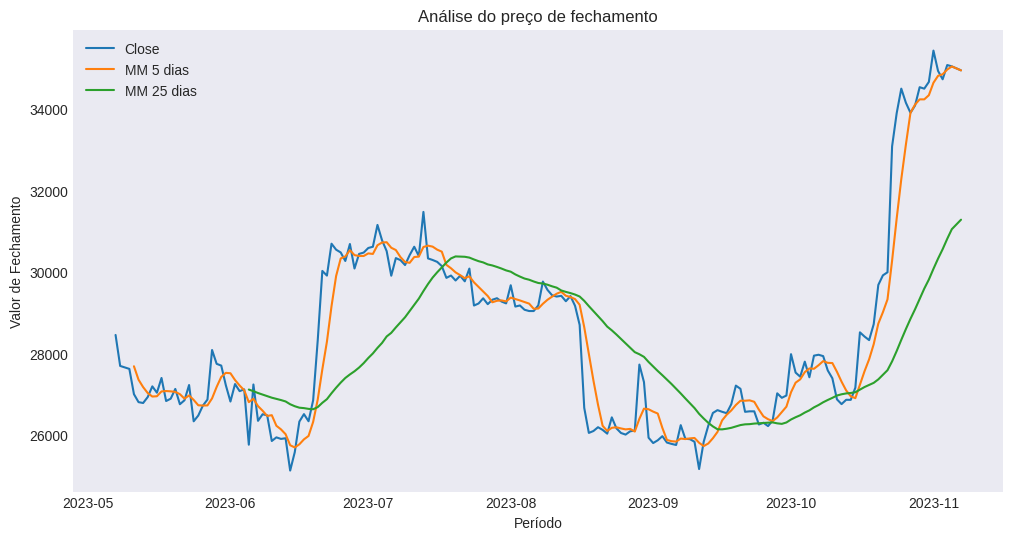

In [ ]:
# estilos
plt.style.use('seaborn-dark')

# tamanho
plt.figure(figsize=(12,6))

# plots
plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=periodo).mean())
plt.plot(dados['Close'].rolling(window=periodo + 25).mean())

# legenda
plt.legend(['Close', 'MM 5 dias', 'MM 25 dias'])

# labels
plt.ylabel('Valor de Fechamento')
plt.xlabel('Período')

plt.title('Análise do preço de fechamento')

### Plotly

O PLOTLY é uma biblioteca Python de plotagem
interativa e de código aberto que oferece suporte a
mais de 40 tipos de gráficos exclusivos, abrangendo
uma ampla variedade de casos de uso estatísticos,
financeiros, geográficos, científicos e
tridimensionais.

**plotly.express (px)** é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.<br>
**plotly.graph_objects (go)** é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [ ]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943


In [ ]:
periodo = 5
dados['media_movel'] = dados['Close'].rolling(window=periodo).mean()

dados.head()

,Open,High,Low,Close,Adj Close,Volume,media_movel
Date,,,,,,,
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486,NaN
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752,NaN
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256,NaN
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026,NaN
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943,27686.114453


In [ ]:
px.line(dados, y='Close', title='Fechamento')

In [ ]:
figure = go.Figure(
    data=go.Scatter(
        x=dados.index,
        y=dados['Close'],
        line=(dict(color='firebrick',width=3))
    )
)

figure.update_layout(
    title='Análise de fechamento',
    xaxis_title='período',
    yaxis_title='preço de fechamento'
)

figure.show()

In [ ]:
# Cria um gráfico de área (área preenchida)

area = px.area(
    data_frame=dados.reset_index(),
    y='Close', x='Date',
    title=f'{simbolo}'
)

# Atualiza as configurações dos eixos x (datas) do gráfico

area.update_xaxes(
    title_text='Data',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1M', step='month', stepmode='backward'),
                      dict(count=6, label='6M', step='month', stepmode='backward'),
                      dict(count=1, label='1Y', step='year', stepmode='backward'),
                      dict(step='all')
        ])
    )
)

# Ajustando o eixo y

area.update_yaxes(title_text='price in USD', ticksuffix='$')

# Austando o título

area.update_layout(
    showlegend=True,
    title={
        'text': f'{simbolo} ({dados.index.min().year}-presente)',
        'y': 0.9,
        'x': 0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    template='plotly_white'
)

area

### Candlestick charts
<br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [ ]:
grafico_candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)

grafico_candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

grafico_candlestick.show()

## Relatório

In [ ]:
relatorio = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type': 'scatter'}],
        [{'type': 'scatter'}]
    ],
    subplot_titles=('Cotação', 'Fechamento'),
    shared_xaxes=True, # ambos os gráficos compartilham o mesmo eixo x
    vertical_spacing=0.075

)

relatorio.update_layout(
    # dimensão
    width=1000, height=880,
    # título do relatório
    title_text='<b>Data Analytics</b> <br>Cotação do Bitcoin',
    # estilo
    template='plotly_dark',
    # ajuste de layout gráfico
    paper_bgcolor='rgb(0,0,0)',
    plot_bgcolor='rgb(10,10,10)',
    # fonte do texto
    font=dict(color='white')
)

# acrescentando o gráfico
relatorio.add_trace(
            go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        ), row = 1, col = 1
)

# retirando a barra visível
relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

# adicionando gráfico na segunda posição
relatorio.add_trace(
      go.Scatter(
          x=dados.index,
          y=dados['Close'],
          mode='lines',
          name='Fechamento',
          line=dict(color='green')
    ), row=2, col=1
)


relatorio.add_trace(
      go.Scatter(
          x=dados.index,
          y=dados['media_movel'],
          mode='lines',
          name='Média móvel',
          line=dict(color='rgb(158,58,171)')
    ), row=2, col=1
)

# ajustes
relatorio.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(size=9)
    )
)

# adicionar texto
relatorio.add_annotation(
    # desativar seta
    showarrow=False,
    # texto
    text="Análise realizada no evento 'Imersão em Dados' - Data Viking",
    # tamanho
    font=dict(size=12),

    # aponta as direções do texto
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

relatorio.add_annotation(
    showarrow=False,
    text='By: Marina Ferreira',
    font=dict(size=12),

    # aponta as direções do texto
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)



relatorio

### Exportando PDF

**Kaleido** <br>
Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [ ]:
# Reiniciar o servidor
!pip install -U kaleido

In [ ]:
relatorio.write_image('Report_Financeiro.pdf')

In [ ]:
relatorio.write_image()